<a href="https://colab.research.google.com/github/pchung39/algo-trading/blob/main/algo_trading_system_tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Algorithmic Trading Strategy Using Python

youtube link: https://www.youtube.com/watch?v=SEQbb8w7VTw&list=PLMJCclkFBqMScOIuyqxWo3g-WIdv-1Rna&index=2&t=39s 

description: This program uses the dual moving average crossover to determine when to buy and sell stocks.


In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')



In [ ]:
from google.colab import files 
uploaded = files.upload()

Saving AAPL.csv to AAPL.csv


In [ ]:
# store data 
AAPL = pd.read_csv('AAPL.csv')

# show data
AAPL

,Date,Open,High,Low,Close,Adj Close,Volume
0,2006-10-02,2.682143,2.709643,2.653571,2.673571,2.302917,712639200
1,2006-10-03,2.658929,2.676786,2.613929,2.645714,2.278921,790708800
2,2006-10-04,2.646429,2.695000,2.612857,2.692143,2.318914,829082800
3,2006-10-05,2.661786,2.720000,2.647500,2.672500,2.301993,683883200
4,2006-10-06,2.657857,2.680000,2.636071,2.650714,2.283228,466958800
...,...,...,...,...,...,...,...
1317,2011-12-22,14.178571,14.254643,14.146429,14.233929,12.260582,202358800
1318,2011-12-23,14.274643,14.413929,14.267500,14.404643,12.407633,269399200
1319,2011-12-27,14.396429,14.610357,14.393571,14.518929,12.506072,265076000
1320,2011-12-28,14.531786,14.580357,14.333571,14.380000,12.386407,228662000


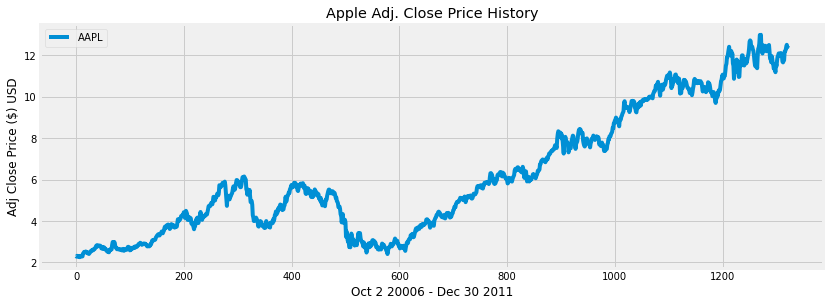

In [ ]:
# visualize data 
plt.figure(figsize=(12.5,4.5))
plt.plot(AAPL['Adj Close'], label='AAPL')
plt.title('Apple Adj. Close Price History')
plt.xlabel('Oct 2 20006 - Dec 30 2011')
plt.ylabel('Adj Close Price ($) USD')
plt.legend(loc='upper left')
plt.show()

In [ ]:
# Create the simple moving average with a 30 day window 

SMA30 = pd.DataFrame()
SMA30['Adj Close'] = AAPL['Adj Close'].rolling(window=30).mean()
SMA30

,Adj Close
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
1317,11.804340
1318,11.822910
1319,11.845378
1320,11.869352


In [ ]:
 # Create a simple moving 100 day average
 SMA100 = pd.DataFrame()
 SMA100['Adj Close'] = AAPL['Adj Close'].rolling(window=100).mean()
 SMA100

,Adj Close
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
1317,11.928072
1318,11.931382
1319,11.940352
1320,11.949280


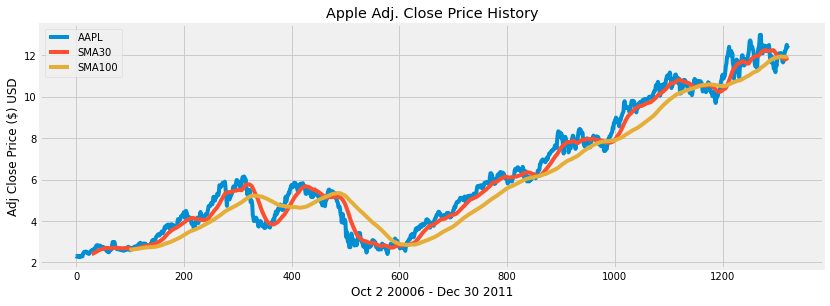

In [ ]:
# visualize data again with SMA's
plt.figure(figsize=(12.5,4.5))
plt.plot(AAPL['Adj Close'], label='AAPL')
plt.plot(SMA30['Adj Close'], label= 'SMA30')
plt.plot(SMA100['Adj Close'], label= 'SMA100')
plt.title('Apple Adj. Close Price History')
plt.xlabel('Oct 2 20006 - Dec 30 2011')
plt.ylabel('Adj Close Price ($) USD')
plt.legend(loc='upper left')
plt.show()


In [ ]:
# Create a new data frame to store all the data
data = pd.DataFrame()
data['AAPL'] = AAPL['Adj Close']
data['SMA30'] = SMA30['Adj Close']
data['SMA100'] = SMA100['Adj Close']
data

,AAPL,SMA30,SMA100
0,2.302917,NaN,NaN
1,2.278921,NaN,NaN
2,2.318914,NaN,NaN
3,2.301993,NaN,NaN
4,2.283228,NaN,NaN
...,...,...,...
1317,12.260582,11.804340,11.928072
1318,12.407633,11.822910,11.931382
1319,12.506072,11.845378,11.940352
1320,12.386407,11.869352,11.949280


In [ ]:
# Create a function to signal when to buy and sell the stock 
def buy_sell(data):
  sig_price_buy = []
  sig_price_sell = []
  flag = -1 

  for i in range(len(data)):
    if data['SMA30'][i] > data['SMA100'][i]:
      if flag != 1:
        sig_price_buy.append(data['AAPL'][i])
        sig_price_sell.append(np.nan)
        flag = 1
      else:
        sig_price_buy.append(np.nan)
        sig_price_sell.append(np.nan)
    elif data['SMA30'][i] < data['SMA100'][i]:
      if flag != 0:
        sig_price_buy.append(np.nan)
        sig_price_sell.append(data['AAPL'][i])
        flag = 0
      else:
        sig_price_buy.append(np.nan)
        sig_price_sell.append(np.nan)
    else:
      sig_price_buy.append(np.nan)
      sig_price_sell.append(np.nan)
    
  return (sig_price_buy, sig_price_sell)

In [ ]:
# store the buy and sell data into a variable 

buy_sell = buy_sell(data)
data['Buy_Signal_Price'] = buy_sell[0]
data['Sell_Signal_Price'] = buy_sell[1]

In [ ]:
# show data
data

,AAPL,SMA30,SMA100,Buy_Signal_Price,Sell_Signal_Price
0,2.302917,NaN,NaN,NaN,NaN
1,2.278921,NaN,NaN,NaN,NaN
2,2.318914,NaN,NaN,NaN,NaN
3,2.301993,NaN,NaN,NaN,NaN
4,2.283228,NaN,NaN,NaN,NaN
...,...,...,...,...,...
1317,12.260582,11.804340,11.928072,NaN,NaN
1318,12.407633,11.822910,11.931382,NaN,NaN
1319,12.506072,11.845378,11.940352,NaN,NaN
1320,12.386407,11.869352,11.949280,NaN,NaN


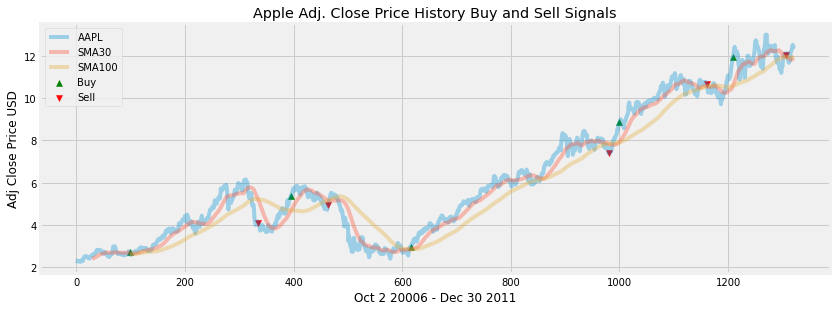

In [ ]:
# Visual the data and the strategy to buy and sell the stock 
plt.figure(figsize=(12.6,4.6))
plt.plot(data['AAPL'], label='AAPL', alpha=0.35)
plt.plot(data['SMA30'], label='SMA30', alpha=0.35)
plt.plot(data['SMA100'], label='SMA100', alpha=0.35)
plt.scatter(data.index, data['Buy_Signal_Price'], label= 'Buy', marker= '^', color='green')
plt.scatter(data.index, data['Sell_Signal_Price'], label= 'Sell', marker= 'v', color='red')
plt.title('Apple Adj. Close Price History Buy and Sell Signals')
plt.xlabel('Oct 2 20006 - Dec 30 2011')
plt.ylabel('Adj Close Price USD')
plt.legend(loc='upper left')
plt.show()